# Setting up the GPU

In [2]:
import tensorflow as tf

# Check for GPU and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPUs are available and memory growth is set")
    except RuntimeError as e:
        print(e)

# Loading the ECG data for all subjects

In [1]:
import os
import pandas as pd

# Specify the directory where the files are located
directory = "/kaggle/input/vollmer-csv/vollmer_s0"  # Replace with the actual directory path

# Create an empty list to store the data from the CSV files
df = pd.DataFrame()
data = []
# Loop through the desired file numbers (1 to 13) with two digits
for file_number in range(1, 14):
    # Use string formatting to ensure two-digit file numbers
    file_name = f"{file_number:02d}.csv"
    #print(file_name)
    file_path = directory + file_name
    #print(file_path)
    data = pd.read_csv(file_path)
    third_column = data.iloc[:, 4] 
    #print(third_column.shape)
    df = pd.concat([df, third_column], axis=1, ignore_index=True)
    #print(df.shape)

# Now, data_list contains the data from the 13 specific CSV files with two-digit file numbers.

print(df.shape)


(608512, 13)


In [3]:
import os
import pandas as pd

# Specify the directory where the files are located
directory = "/kaggle/input/vollmer-csv/vollmer_labels_s0"  # Replace with the actual directory path

# Create an empty list to store the data from the CSV files
cut_points = pd.DataFrame()

# Loop through the desired file numbers (1 to 13) with two digits
for file_number in range(1, 14):
    # Use string formatting to ensure two-digit file numbers
    file_name = f"{file_number:02d}.csv"
    #print(file_name)
    file_path = directory + file_name
    #print(file_path)
    cut = pd.read_csv(file_path)
    #print(cut)
    selected_columns = cut[['FAROS_Marker/Rest', 'FAROS_Marker/Walking', 'FAROS_Marker/2-Back','Manual/Running']]

    #print(selected_columns3)
    cut_points = pd.concat([cut_points, selected_columns], axis=0, ignore_index=True)

# Now, data_list contains the data from the 13 specific CSV files with two-digit file numbers.

print(cut_points.shape)


(13, 4)


In [4]:
ecg = df[0]
    #print(ecg)
cut_point = cut_points.iloc[0]
cut_point1 = cut_point[0]
ecg = ecg.to_frame()
ecg.reset_index(drop=True, inplace=True)
print(ecg.T)
rest = ecg.iloc[cut_point1:cut_point1+76800]
rest.reset_index(drop=True, inplace=True)
print(rest.T)

    0         1         2         3         4         5         6       \
0 -0.24157 -0.195505 -0.125561 -0.240799 -0.171625 -0.125561 -0.240799   

     7         8         9       ...  608502  608503  608504  608505  608506  \
0 -0.265603 -0.222158 -0.135267  ...     NaN     NaN     NaN     NaN     NaN   

   608507  608508  608509  608510  608511  
0     NaN     NaN     NaN     NaN     NaN  

[1 rows x 608512 columns]
      0         1         2         3         4         5         6      \
0 -0.126485 -0.175169 -0.107844 -0.110463 -0.090126 -0.118474 -0.214147   

     7         8         9      ...     76790     76791     76792     76793  \
0 -0.15206 -0.317831 -0.145897  ...  0.014482  0.017101 -0.046681 -0.109538   

      76794     76795     76796     76797     76798     76799  
0 -0.145897 -0.253124 -0.266374 -0.301808 -0.336472 -0.397635  

[1 rows x 76800 columns]


In [5]:
import numpy as np
import pandas as pd
result = pd.DataFrame()
labels = []
for i in range(13):
    ecg = df[i]
    #print(ecg)
    cut_point = cut_points.iloc[i]
    cut_point1 = cut_point[0]
    ecg = ecg.to_frame()
 
    #print(cut_point[1])
    rest = ecg.iloc[cut_point1:cut_point1+76800]
    rest.reset_index(drop=True, inplace=True)
    result = pd.concat([result, rest], axis=1, ignore_index=True)

    #walking = ecg.iloc[cut_point[1]:cut_point[1]+76800]
    #walking.reset_index(drop=True, inplace=True)
    #result = pd.concat([result, walking], axis=1, ignore_index=True)

    stress = ecg.iloc[cut_point[2]:cut_point[2]+76800]
    stress.reset_index(drop=True, inplace=True)
    result = pd.concat([result, stress], axis=1, ignore_index=True)

    #running = ecg.iloc[cut_point[3]:cut_point[3]+76800]
    #running.reset_index(drop=True, inplace=True)
    #result = pd.concat([result, running], axis=1, ignore_index=True)
    
    label = [0,1]
    labels = labels+label

print(result)
print(labels)

             0         1         2         3         4         5         6   \
0     -0.126485  0.086275 -0.036148 -0.090777 -0.111259 -0.285777 -0.069258   
1     -0.175169  0.107535  0.009377 -0.071616 -0.104549 -0.282584 -0.081570   
2     -0.107844  0.130491  0.004349 -0.103007 -0.123651 -0.292974 -0.050805   
3     -0.110463  0.222774  0.082216 -0.167828 -0.110014 -0.285290 -0.032351   
4     -0.090126  0.337859  0.160218 -0.182913 -0.116183 -0.290755 -0.044663   
...         ...       ...       ...       ...       ...       ...       ...   
76795 -0.253124 -0.232788  0.167285 -0.144455 -0.127818 -0.058497 -0.093175   
76796 -0.266374 -0.212298  0.138883 -0.069577 -0.121378 -0.052815 -0.092467   
76797 -0.301808 -0.097213  0.136845 -0.101920 -0.103087 -0.085500 -0.092212   
76798 -0.336472 -0.073180  0.005300 -0.030168 -0.097893 -0.085771 -0.117063   
76799 -0.397635 -0.004160 -0.048378 -0.115102 -0.111475 -0.079061 -0.137413   

             7         8         9   ...        16 

# Making 1 min segments

In [6]:
midpoint = int(76800/5)  # Adjust the value as needed

# Split the result into two DataFrames
first_half = result.iloc[:midpoint,: ]
first_half.reset_index(drop=True, inplace=True)

second_half = result.iloc[ midpoint:midpoint*2,:]
second_half.reset_index(drop=True, inplace=True)

third_half = result.iloc[ midpoint*2:midpoint*3,:]
third_half.reset_index(drop=True, inplace=True)

fourth_half = result.iloc[ midpoint*3:midpoint*4,:]
fourth_half.reset_index(drop=True, inplace=True)

fifth_half = result.iloc[ midpoint*4:midpoint*5,:]
fifth_half.reset_index(drop=True, inplace=True)
print(fifth_half)
# Concatenate the two DataFrames
concatenated_result = pd.concat([first_half, second_half,third_half, fourth_half, fifth_half], axis=1, ignore_index=True)
concatenated_label = labels+labels+labels+labels+labels
concatenated_labels = pd.DataFrame(concatenated_label)
concatenated_results = concatenated_result.T
print(concatenated_results)
print(concatenated_labels.shape)

             0         1         2         3         4         5         6   \
0      0.009090 -0.174244 -0.216342 -0.214304  0.692120 -0.126844 -0.066428   
1     -0.062549 -0.179637 -0.163752  0.355497  0.148706 -0.133283 -0.070928   
2     -0.086583 -0.207060 -0.163752  1.160122 -0.247681 -0.113964 -0.100505   
3     -0.205211 -0.233713 -0.084797  2.039624 -0.328852 -0.126844 -0.087005   
4     -0.249581 -0.099832 -0.058434  3.155988 -0.326904 -0.126844 -0.078966   
...         ...       ...       ...       ...       ...       ...       ...   
15355 -0.253124 -0.232788  0.167285 -0.144455 -0.127818 -0.058497 -0.093175   
15356 -0.266374 -0.212298  0.138883 -0.069577 -0.121378 -0.052815 -0.092467   
15357 -0.301808 -0.097213  0.136845 -0.101920 -0.103087 -0.085500 -0.092212   
15358 -0.336472 -0.073180  0.005300 -0.030168 -0.097893 -0.085771 -0.117063   
15359 -0.397635 -0.004160 -0.048378 -0.115102 -0.111475 -0.079061 -0.137413   

             7         8         9   ...        16 

# Sample plotting of ECG signals

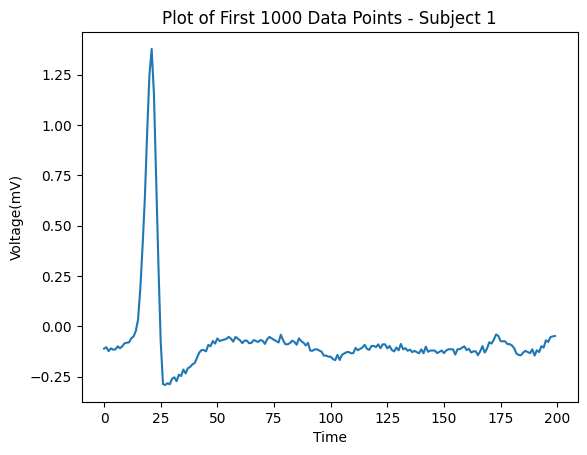

In [7]:
import matplotlib.pyplot as plt

# Select the data for the first subject
wesad_x = pd.DataFrame(concatenated_results.T)
subject_data = wesad_x.iloc[:200, 4]  # Assuming the first column represents the first subject

# Create a time axis for the plot
time_axis = range(200)

# Plot the data
plt.plot(time_axis, subject_data)
plt.xlabel('Time')
plt.ylabel('Voltage(mV)')
plt.title('Plot of First 1000 Data Points - Subject 1')
plt.show()

In [8]:
import numpy as np

# Convert the Pandas DataFrame 'features' to a NumPy array
features2 = concatenated_results.values

filtered_data = features2
print(filtered_data)

(130, 15360)
[[-0.12648516 -0.17516885 -0.10784362 ... -0.04575651 -0.13973452
  -0.051919  ]
 [ 0.08627489  0.10753549  0.13049078 ... -0.26822248 -0.29117777
  -0.24511314]
 [-0.03614764  0.00937664  0.00434859 ... -0.38634491 -0.33375417
  -0.36011749]
 ...
 [-0.53177967 -0.53076804 -0.55605877 ...  0.7138729   0.63918095
   0.69633799]
 [-0.23918338 -0.2477754  -0.30095307 ... -0.05898309 -0.06246634
  -0.08777798]
 [-0.07895374 -0.19552661 -0.19900986 ... -0.16069408 -0.1651062
  -0.12586154]]


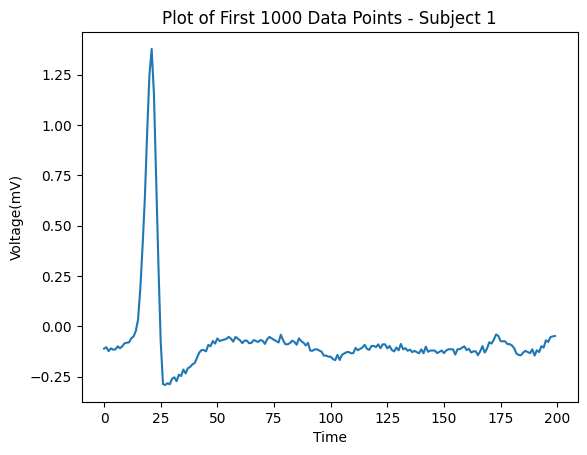

In [9]:
import matplotlib.pyplot as plt

# Select the data for the first subject
wesad_x = pd.DataFrame(filtered_data.T)
subject_data = wesad_x.iloc[:200, 4]  # Assuming the first column represents the first subject

# Create a time axis for the plot
time_axis = range(200)

# Plot the data
plt.plot(time_axis, subject_data)
plt.xlabel('Time')
plt.ylabel('Voltage(mV)')
plt.title('Plot of First 1000 Data Points - Subject 1')
plt.show()

In [10]:
y=concatenated_labels
print(y.shape)

(130, 1)


# Making of 10 sec each. so y will be doubled

In [11]:
import pandas as pd

# Assuming filtered_data is your DataFrame
# Split the DataFrame into two halves along the columns
#this is for 30 sec segment 15360

first = filtered_data[:, :2560]
first1 = filtered_data[:, 2560:5120]
second = filtered_data[:, 5120:7680]
print(second.shape)
second1 = filtered_data[:, 7680:10240]
third = filtered_data[:, 10240:12800]
third1 = filtered_data[:, 12800:]

# Stack the two halves along the rows
result = np.vstack((first, first1, second, second1, third, third1))

# Verify the shape of the resulting array
print(result.shape)  # This should print (260, 7680)


(130, 2560)
(780, 2560)


In [12]:
import numpy as np
repeated_y = np.tile(y, (6, 1))

# Verify the shape of the resulting array
print(repeated_y.shape) 

(780, 1)


In [13]:
y = repeated_y
filtered_data = result

# Test-train splitting for further training of the data.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming filtered_data and repeated_y (as y) are already defined
X_train, X_test, y_train, y_test = train_test_split(filtered_data, repeated_y, test_size=0.3, shuffle=True, stratify=repeated_y)

# Scaling the data
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

# Reshape y_train and y_test to 1D arrays for proper indexing
y_train = y_train.ravel()
y_test = y_test.ravel()

# Select majority and minority classes
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]

print(X_minority.shape)
print(X_majority.shape)


(273, 2560)
(273, 2560)


# Checking if there are minority and majority samples. As it was balanced dataset, no augmentatin was done

In [15]:
X_minority_augmented = np.zeros((2*X_minority.shape[0], 2304))
print(X_minority_augmented.shape)
j=0
i=0
#print(int(X_minority.shape[0]/2))
for i in range(int(X_minority.shape[0]/2)):
    i = i*2
    #print(i)
    x1=X_minority[i,:]
    x2=X_minority[i+1,:]
    x_combined = np.concatenate((X_minority[i,:], X_minority[i+1,:]))
    #print(x_combined.shape)
    x3 = x_combined[768:3072]
    x4 = x_combined[1792:4096]
    #print(x3.shape)
    #print(x2.shape)
        
    X_minority_augmented[j] = x1  #np.roll(x1, 2000)
    j=j+1    
    X_minority_augmented[j] = x2  #np.roll(x1, 2000)
    j=j+1
    X_minority_augmented[j] = x3  #np.roll(x1, 2000)
    j=j+1
    #x1=X_minority[i,:]
    X_minority_augmented[j] = x4 #np.roll(x1, 2000)x1
    j=j+1
    #i=i+1
    #print(i)
#print(i)
print(X_minority_augmented.shape)
X_majority_augmented = X_majority
X_minority_augmented = X_minority
print(X_majority_augmented.shape)


(819, 2560)
(273, 2560)


In [16]:
X_train_augmented = np.vstack((X_majority_augmented, X_minority_augmented))
y_train_augmented = np.hstack((np.zeros(X_majority_augmented.shape[0]), np.ones(X_minority_augmented.shape[0])))
# shuffle the data

idx = np.random.permutation(X_train_augmented.shape[0])
#print(idx)
X_train_augmented = X_train_augmented[idx]
y_train_augmented = pd.DataFrame(y_train_augmented[idx])
print(X_train_augmented.shape)
#print(y_train_augmented[0])
X_train=X_train_augmented
y_train=y_train_augmented
print(X_train.shape)

(546, 2560)
(546, 2560)


# Making of the Model

In [17]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Attention, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input layer
input_layer = Input(shape=(2560, 1))

# Shared CNN layers
def shared_cnn(input_layer, filters1, kernel_size1, filters2, kernel_size2, filters3, kernel_size3):
    conv1 = Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu')(input_layer)
    maxpool1 = MaxPooling1D(pool_size=2)(conv1)
    batch_norm1 = BatchNormalization()(maxpool1)

    conv2 = Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu')(batch_norm1)
    maxpool2 = MaxPooling1D(pool_size=2)(conv2)
    batch_norm2 = BatchNormalization()(maxpool2)

    conv3 = Conv1D(filters=filters3, kernel_size=kernel_size3, activation='relu')(batch_norm2)
    maxpool3 = MaxPooling1D(pool_size=2)(conv3)
    batch_norm3 = BatchNormalization()(maxpool3)

    return batch_norm3

# Shared BiLSTM layer with attention
def shared_bilstm_with_attention(shared_cnn_output, units, return_sequences, num_heads):
    bilstm_output = Bidirectional(LSTM(units=units, return_sequences=return_sequences))(shared_cnn_output)
    attention_heads = []
    for _ in range(num_heads):
        attention_head = Attention()([bilstm_output, bilstm_output])
        attention_heads.append(attention_head)

    # Concatenate the outputs of attention heads
    multi_attention = Concatenate(axis=-1)(attention_heads)
    global_pool = GlobalMaxPooling1D()(multi_attention)
    return global_pool

# Apply shared CNN and BiLSTM with attention to each input path with different parameters
shared_cnn_output1 = shared_cnn(input_layer, filters1=64, kernel_size1=10, filters2=128, kernel_size2=5, filters3=256, kernel_size3=3)
shared_bilstm_output1 = shared_bilstm_with_attention(shared_cnn_output1, units=64, return_sequences=True, num_heads=4)

shared_cnn_output2 = shared_cnn(input_layer, filters1=32, kernel_size1=14, filters2=64, kernel_size2=8, filters3=128, kernel_size3=5)
shared_bilstm_output2 = shared_bilstm_with_attention(shared_cnn_output2, units=32, return_sequences=True, num_heads=2)

# Concatenate the outputs of both paths
concatenated_output = Concatenate(axis=-1)([shared_bilstm_output1, shared_bilstm_output2])
# Dense layers
global_pool2 = GlobalMaxPooling1D()(shared_cnn_output2)
global_pool1 = GlobalMaxPooling1D()(shared_cnn_output1)
concatenated_output2 = Concatenate(axis=-1)([global_pool1, global_pool2])

# Dense layers
dense1 = Dense(units=256, activation='relu', kernel_regularizer=l2(0.01))(shared_bilstm_output1)
batch_norm4 = BatchNormalization()(dense1)
drop1 = Dropout(0.4)(batch_norm4)

dense2 = Dense(units=128, activation='relu', kernel_regularizer=l2(0.01))(drop1)
batch_norm5 = BatchNormalization()(dense2)
drop2 = Dropout(0.4)(batch_norm5)

# Output layer
output = Dense(units=1, activation='sigmoid')(drop2)

# Model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2560, 1)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 2551, 64)             704       ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 2547, 32)             480       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 1275, 64)             0         ['conv1d[0][0]']              
 D)                                                                                           

# Training of the model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# Define early stopping and checkpoint callbacks
es = EarlyStopping(monitor='val_loss', mode='min', patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model with early stopping and checkpoint callbacks
history = model.fit(X_train, y_train, epochs=600, batch_size=32, validation_data=(X_test, y_test), callbacks=[es, mc])

# extracting the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model
# Load the saved model
model = load_model('best_model.h5')

# Predict the class probabilities for the test set
y_pred = model.predict(X_test)

# Convert the probabilities into class labels using a threshold of 0.5
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

# plotting the loss vs epoch graph

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Print loss vs. epoch curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# calculating the AUC score

In [ ]:
# Calculate predictions for the test set
y_pred = model.predict(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Print AUC score
print('AUC Score:', auc_score)

# Plotting the ROC curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predictions for the test set
y_pred = model.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Feature Maps for 2 example showing seperately

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Assuming 'X_test' is your test data and 'model' is your trained model

# Specify the layers for which you want to visualize the feature maps
conv_layers = ['conv1d_3']  # Replace with actual layer names

# Create a new model that outputs the activations of the specified layers
layer_outputs = [model.get_layer(layer_name).output for layer_name in conv_layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Number of examples you want to visualize
num_examples = 10  # You can change this to the number of examples you want to visualize

# Generate and visualize feature maps for example 1 and example 6
examples_to_visualize = [12,16]

for i in examples_to_visualize:
    input_tensor = tf.convert_to_tensor(X_test[i:i+1], dtype=tf.float32)
    true_class = y_test[i]  # Get the true class label for the example
    
    # Get the feature maps
    activations = activation_model.predict(input_tensor)
    
    # Get the predicted class
    prediction = model.predict(input_tensor)
    predicted_class = int(prediction > 0.5)  # Assuming binary classification with sigmoid

    # Define title color based on the true class
    title_color = 'purple' if true_class == 0 else 'orange'

    for layer_name, activation in zip(conv_layers, activations):
        num_filters = activation.shape[-1]
        num_cols = 8  # Number of columns for subplot
        num_rows = (num_filters + num_cols - 1) // num_cols  # Calculate number of rows needed

        plt.figure(figsize=(15, num_rows * 2))
        for j in range(num_filters):
            plt.subplot(num_rows, num_cols, j + 1)
            plt.plot(activation[:, j])  # Corrected indexing for 2D array
            plt.title(f'Filter {j}')
            plt.axis('off')
        plt.suptitle(
            f'Example {i+1} - True Class: {true_class} - Predicted Class: {predicted_class} - Feature maps for layer: {layer_name}', 
            fontsize=16, color=title_color
        )
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
        plt.show()


# Feature maps of 2 example showing side by side.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Assuming 'X_test' is your test data and 'model' is your trained model

# Specify the layers for which you want to visualize the feature maps
conv_layers = ['conv1d_3']  # Replace with actual layer names

# Create a new model that outputs the activations of the specified layers
layer_outputs = [model.get_layer(layer_name).output for layer_name in conv_layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
colors = ['blue', 'red']
# Indices of the examples you want to visualize
examples_to_visualize = [12, 16]

# Ensure the selected examples exist in the dataset
if max(examples_to_visualize) >= len(X_test):
    raise ValueError("Example index out of range")

# Generate and visualize feature maps for the specified convolutional layer
for layer_name in conv_layers:
    # Collect activations for both examples
    activations = []
    for i in examples_to_visualize:
        input_tensor = tf.convert_to_tensor(X_test[i:i+1], dtype=tf.float32)
        activation = activation_model.predict(input_tensor)
        activations.append(activation[0])  # Extract the first (and only) batch element
    
    num_filters = activations[0].shape[-1]
    num_cols = 16  # Number of columns for subplot
    num_rows = (num_filters + num_cols - 1) // num_cols * len(examples_to_visualize)  # Calculate rows needed

    plt.figure(figsize=(24, num_rows * 2))
    for j in range(num_filters):
        for k, activation in enumerate(activations):
            plt.subplot(num_rows, num_cols, j * len(examples_to_visualize) + k + 1)
            plt.plot(activation[:, j], color=colors[k])
            if k == 0:
                plt.title(f'                     Filter {j}',fontsize = 16)
            plt.axis('off')
    plt.suptitle(
        f'Feature Maps for Layer: {layer_name} - True Positive (Ex. {examples_to_visualize[0]+1}) Vs True Negative (Ex. {examples_to_visualize[1]+1})', 
        fontsize=24
    )
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title : Ex. {examples_to_visualize[0]} Vs Ex. {examples_to_visualize[1]}
    plt.savefig('Feature_mapping_conv1d_3_wesad.png') 
    plt.show()


# Defining the function of UMAP

In [ ]:
pip install umap-learn
from tensorflow.keras.models import load_model
import numpy as np
import umap
import matplotlib.pyplot as plt
import umap.umap_ as umap
from tensorflow.keras.models import load_model

# Assuming 'model' is your Keras model
for layer in model.layers:
    print(layer.name)

# UMAP Embeddign representation for raw ECG signals.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'input_layer'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Rep. of Test Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_maps1.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of batch_normalization_2 (3rd cnn of block 1) layer embedding.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'batch_normalization_2'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of CNN Layers')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_cnn1.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of batch_normalization_5 (3rd cnn of block 2) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'batch_normalization_5'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of CNN Layers')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_cnn2.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of bilstm(bilstm of block 1) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'bidirectional'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of BiLSTM Layer')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_bilstm1.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of bilstm(bilstm of block 2) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'bidirectional_1'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of BiLSTM Layer')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_bilstm2.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of attention mechanism (block 1) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'concatenate'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of MHA Layer')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_attention1.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of bilstm (block 1) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'concatenate_1'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of MHA Layer')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_attention2.png')  # You can change the filename and format as needed

plt.show()

# UMAP Embedding representation of dropout_1 (output block dense layer 2) layer embedding

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import umap

# Specify the layer name
layer_name = 'dropout_1'  # Replace with your actual layer name

# Create a new model that outputs the activations of the specified layer
layer_output = model.get_layer(layer_name).output
activation_model = Model(inputs=model.input, outputs=layer_output)

# Get feature maps for all test data
feature_maps = activation_model.predict(X_test)
# Flatten feature maps to 2D array (samples, features)
num_samples = feature_maps.shape[0]
num_features = np.prod(feature_maps.shape[1:])  # Flatten all dimensions except the batch dimension
flattened_feature_maps = feature_maps.reshape(num_samples, num_features)

# Run UMAP to reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(flattened_feature_maps)


# Assuming you have true positive and true negative labels
tp_indices = np.where(y_test == 1)[0]
tn_indices = np.where(y_test == 0)[0]

plt.figure(figsize=(5, 4))
plt.scatter(umap_embedding[tp_indices, 0], umap_embedding[tp_indices, 1], color='red', label='Positives', s=10)
plt.scatter(umap_embedding[tn_indices, 0], umap_embedding[tn_indices, 1], color='blue', label='Negatives', s=10)
plt.title(f'UMAP Features Rep. of Dense Layer 2')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
# Save the plot as an image file
plt.savefig('umap_feature_dense2.png')  # You can change the filename and format as needed

plt.show()